In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from BondingCurveNexus.EducationGraphs.RAMM_HighLowCap_Protocol_det import RAMMHighLowCapProtocolDet 

In [3]:
sim = RAMMHighLowCapProtocolDet()

In [4]:
sim.show_metrics()

 Capital pool: 145682 ETH
 Below NXM price: 0.01543372 ETH
 Above NXM price: 0.021769050927728437 ETH
 NXM Supply: 6759082.90574952
 Book Value: 0.021553515770028155 ETH
 RAMM ETH Liquidity: 5000
 Below NXM Reserve: 323965.9654315356
 Above NXM Reserve: 229683.8762792008


In [5]:
nxm_sale_size_1 = 10_000
sim.protocol_nxm_sale(nxm_sale_size_1)
sim.write_metrics()

In [6]:
sim.show_metrics()

 Capital pool: 145532.28414516614 ETH
 Below NXM price: 0.014523288739613982 ETH
 Above NXM price: 0.021769050927728437 ETH
 NXM Supply: 6749082.90574952
 Book Value: 0.021563268102868863 ETH
 RAMM ETH Liquidity: 4850.284145166133
 Below NXM Reserve: 333965.9654315356
 Above NXM Reserve: 222806.41270346148


In [7]:
no_sale_steps_1 = 5
for i in range(no_sale_steps_1):
    sim.sell_ratchet()
    sim.write_metrics()

In [8]:
nxm_sale_size_2 = 5_000
sim.protocol_nxm_sale(nxm_sale_size_2)
sim.write_metrics()

In [9]:
no_sale_steps_2 = 15
for i in range(no_sale_steps_2):
    sim.sell_ratchet()
    sim.write_metrics()

 Capital pool: 145458.62399234617 ETH
 Below NXM price: 0.015030458158420914 ETH
 Above NXM price: 0.021769050927728437 ETH
 NXM Supply: 6744082.90574952
 Book Value: 0.02156833271849885 ETH
 RAMM ETH Liquidity: 4996.623992346156
 Below NXM Reserve: 332433.2458586277
 Above NXM Reserve: 229528.79337434418
8.627333087399616e-05
 Capital pool: 145458.62399234617 ETH
 Below NXM price: 0.01511673148929491 ETH
 Above NXM price: 0.021769050927728437 ETH
 NXM Supply: 6744082.90574952
 Book Value: 0.02156833271849885 ETH
 RAMM ETH Liquidity: 5000
 Below NXM Reserve: 330759.33137668076
 Above NXM Reserve: 229683.8762792008
8.627333087399616e-05
 Capital pool: 145458.62399234617 ETH
 Below NXM price: 0.015203004820168906 ETH
 Above NXM price: 0.021769050927728437 ETH
 NXM Supply: 6744082.90574952
 Book Value: 0.02156833271849885 ETH
 RAMM ETH Liquidity: 5000
 Below NXM Reserve: 328882.3531363223
 Above NXM Reserve: 229683.8762792008
8.627333087399616e-05
 Capital pool: 145458.62399234617 ETH
 Be

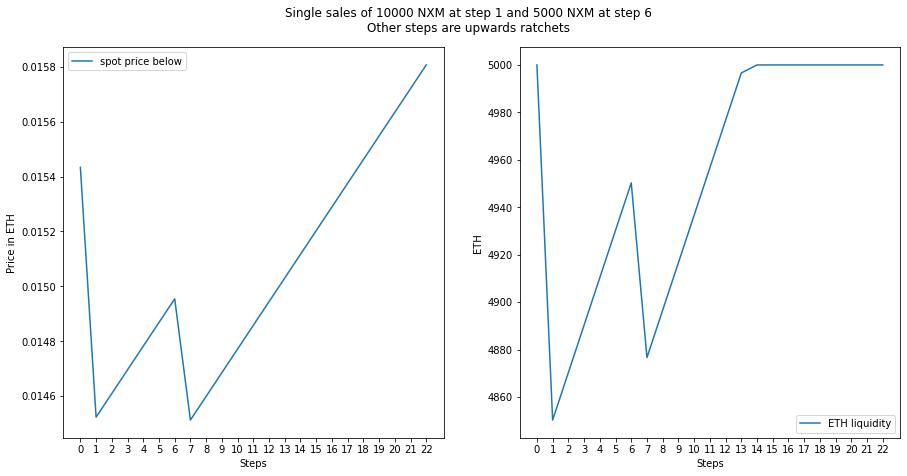

In [14]:
# Figure
fig, axs = plt.subplots(1, 2, figsize=(15,7))
fig.suptitle(f'''Single sales of {nxm_sale_size_1} NXM at step 1 and {nxm_sale_size_2} NXM at step 6
Other steps are upwards ratchets
            ''',
             fontsize=12)
fig.subplots_adjust(top=0.90)

# Subplot
axs[0].plot(range(sim.steps+1), sim.spot_price_b_prediction, label='spot price below')
# plt.plot(range(sim.steps+1), sim.book_value_prediction, label='book value')
# plt.ylim(bottom=0.0125)
axs[0].legend()
axs[0].set_xlabel("Steps")
axs[0].set_xticks(ticks=range(sim.steps+1))
axs[0].set_ylabel("Price in ETH");

# Subplot
axs[1].plot(range(sim.steps+1), sim.liq_prediction, label='ETH liquidity')
axs[1].legend()
axs[1].set_xlabel("Steps")
axs[1].set_xticks(ticks=range(sim.steps+1))
axs[1].set_ylabel("ETH");